In [1]:
# Load specific forecasting and evaluation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy

In [2]:
# Forecast - one step out of sample
# Load datasets
df = pd.read_excel('TestData1DFull_1m.xls', index_col= 'time', parse_dates= True)
df = df.dropna()
df.head()

,RMS_Value
time,
2019-11-28 07:00:00,0.984083
2019-11-28 07:01:00,1.246701
2019-11-28 07:02:00,1.004492
2019-11-28 07:03:00,0.979750
2019-11-28 07:04:00,0.886278


In [3]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [5]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]



In [6]:
# seasonal difference
X = df.values
minutes_in_hour = 60
differenced = difference(X, minutes_in_hour)



In [7]:
# fit model
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit(disp=0)


In [8]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]


C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [9]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, minutes_in_hour)
print('Forecast: %f' % forecast)



Forecast: 0.878510


In [10]:
# Multiple out of sample forecast, create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [11]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [35]:
# Load the data
X = dataset.values
minutes_in_hour = 60
differenced = difference(X, minutes_in_hour)

In [36]:
# fit model
model = ARIMA(differenced, order=(0,1,1))
model_fit = model.fit(disp=0)


In [37]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=60)[0]


C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [38]:
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, minutes_in_hour)
	print('Minute %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Minute 1: 0.830014
Minute 2: 0.809924
Minute 3: 0.804660
Minute 4: 0.783723
Minute 5: 0.784132
Minute 6: 0.766706
Minute 7: 0.760662
Minute 8: 0.769520
Minute 9: 0.773191
Minute 10: 0.764056
Minute 11: 0.780896
Minute 12: 0.775816
Minute 13: 0.785536
Minute 14: 0.794727
Minute 15: 0.795271
Minute 16: 0.812291
Minute 17: 0.817766
Minute 18: 0.822663
Minute 19: 0.833633
Minute 20: 0.832870
Minute 21: 0.845302
Minute 22: 0.855724
Minute 23: 0.848814
Minute 24: 0.825983
Minute 25: 0.829914
Minute 26: 0.822627
Minute 27: 0.806056
Minute 28: 0.797488
Minute 29: 0.789205
Minute 30: 0.800264
Minute 31: 0.780460
Minute 32: 0.788522
Minute 33: 0.819276
Minute 34: 0.793635
Minute 35: 0.818653
Minute 36: 0.783782
Minute 37: 0.782750
Minute 38: 0.774834
Minute 39: 0.780547
Minute 40: 0.775851
Minute 41: 0.781652
Minute 42: 0.788914
Minute 43: 0.771450
Minute 44: 0.793969
Minute 45: 0.779400
Minute 46: 0.786566
Minute 47: 0.820042
Minute 48: 0.803072
Minute 49: 0.828693
Minute 50: 0.829611
Minute 51

In [18]:
plt.plot(inverted)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

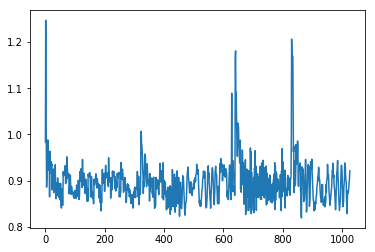

In [28]:
plt.plot(history)
plt.show()

In [29]:
dfF = pd.read_excel('TestData1DFull_1m.xls', parse_dates= True)
dfF = dfF.dropna()
dfF.head()



C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


,time,RMS_Value
0,2019-11-28 07:00:00,0.984083
1,2019-11-28 07:01:00,1.246701
2,2019-11-28 07:02:00,1.004492
3,2019-11-28 07:03:00,0.979750
4,2019-11-28 07:04:00,0.886278


In [30]:
dfF.reset_index(drop=True, inplace=True)
dfF.head()

,time,RMS_Value
0,2019-11-28 07:00:00,0.984083
1,2019-11-28 07:01:00,1.246701
2,2019-11-28 07:02:00,1.004492
3,2019-11-28 07:03:00,0.979750
4,2019-11-28 07:04:00,0.886278


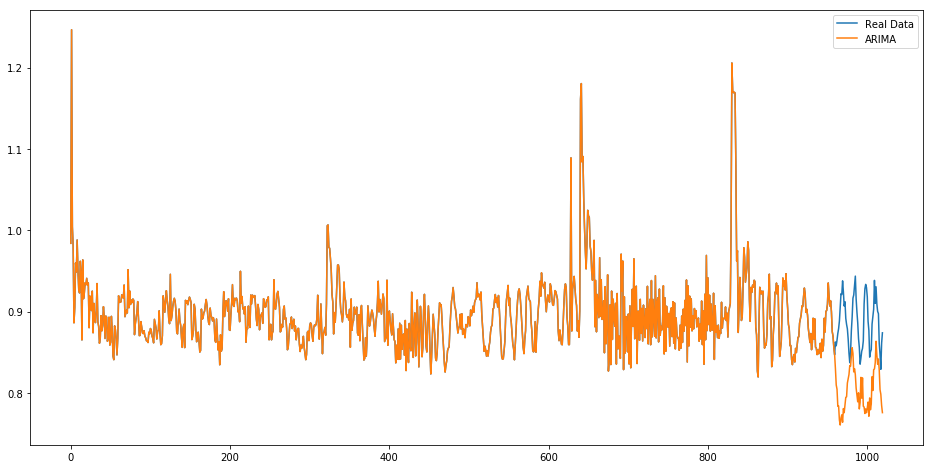

In [44]:
plt.figure(figsize=(16,8))
plt.plot(dfF['RMS_Value'], label = 'Real Data')
plt.plot(history, label = 'ARIMA' )
plt.legend(loc='best')
plt.show()


In [41]:
#split the dataset
split_point = len(df) - 60
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', index=False) 
validation.to_excel('validation.xlsx', index=False)


Dataset 960, Validation 60


In [40]:
plt.plot(dataset['RMS_Value'])
plt.plot(validation['RMS_Value'])
plt.plot(history)
plt.show()



ValueError: view limit minimum -36869.59996527778 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [42]:
dfDataset = pd.read_excel('dataset.xlsx', parse_dates= True)
dfValid = pd.read_excel('validation.xlsx', parse_dates= True)

C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"
C:\Users\Darja Strahlberg\Anaconda3\envs\tsa_course\lib\site-packages\pandas\io\excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


In [ ]:
plt.plot(dataset['RMS_Value'])
plt.plot(validation['RMS_Value'])
plt.plot(history)
plt.show()



In [ ]:
dfValidate.reset_index(drop=True, inplace=True)
dfF.head()
